<a href="https://colab.research.google.com/github/Davidjr2889/Davidjr2889/blob/main/Dataset_manfing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vamos carregar algumas bibliotecas para fazer manipulação com pandas, visualização com matplotlib e seaborn como complemento, alem de tirar algumas advertencias.

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from os import replace
import warnings
warnings.filterwarnings('ignore')

### Vou carregar meu dataset como df

In [ ]:
df = pd.read_excel('C:/Users/jcont/Desktop/teste/DataSet_Test.xlsx')

### Vou ler meu dataset para visualizar os dados que vem nelas

In [ ]:
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Vamos verificar o tamanho e o tipo de dados, alem de ver se temos dados nulos ou nao

In [ ]:
# Verificando o tamanho do dataset
print('features:\t{}'.format(df.shape[1]))
print('entries:\t{}'.format(df.shape[0]))

# Verificando o tipo de variaveis
display(df.info())
# Verificar se tem algum valor vazio
display(df.isna().any())
# Somatoria de valores vazios
display(df.isna().sum())

features:	7
entries:	522064
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


None

BillNo        False
Itemname       True
Quantity      False
Date          False
Price         False
CustomerID     True
Country       False
dtype: bool

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

### Vou Trabalhar com um Segundo Dataset para não alterar o primeiro e poder
### Realizar algumas analises, além de re organizar colunas e tirar as que não vamos utilizar

In [ ]:
# Vou trabalhar com um segundo dataset para nao alterar o principal.
df1 = df.copy()

# Preciso das colunas que existem no df1
df1.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

### Nesta Breve Leitura, ja podemos identificar dados que estão vazios.
### Desde já vamos tirar a coluna CostumerID, pois só ela significa o 25 % do dataset

In [ ]:
# Exclui CostumerID, pois representava 1/4 do dataframe 
df1 = df1[['BillNo', 'Itemname', 'Quantity', 'Date', 'Price','Country']]

# Faço um drop para eliminar valores vazios que nao tenho como preencher
df1 = df1.dropna()

### Uma boa pratica nesse caso ao trabalhar com datas, seria separar elas por ano, mes e dia.

In [ ]:
def data_(df1):
    
    # Entrada
    df1['Date'] = pd.to_datetime(df1['Date'])
    # Saida esperada
    df1['Year'] = df1['Date'].apply(lambda x: x.year)
    df1['Month'] = df1['Date'].apply(lambda x: x.month)
    df1['Day'] = df1['Date'].apply(lambda x: x.day)
    
        
data_(df1)

### Visualizando o df1, podemos observar que ano, mes e dia ja foi separado, isso vai ajudar mais pra frente o nosso aprendizado de maquina.

In [ ]:
df1

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9


### Vou trabalhar com um segundo df para verificar algumas coisas.

In [ ]:
# Vou criar um segundo df
df2 = df1.copy()

# Verficar quais Paises Existem no df2
df2.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Sweden', 'Austria',
       'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Unspecified', 'Brazil',
       'USA', 'Malta', 'RSA'], dtype=object)

### A ideia principal de fazer esse unique(), foi exatamente para poder construir um dicionario com todos os paises existentes no data set e poder colocar dentro da regiao ou continente correspondente

In [ ]:
dict_1 = {

    'Germany':'Germanic Countries', 
    'Switzerland':'Germanic Countries',
    'Austria':'Germanic Countries',

    'Belgium':'Benelux',
    'Netherlands':'Benelux',

    'France':'Western Europe',
    'Monaco':'Western Europe',

    'Spain':'Southern Europe',
    'Greece':'Southern Europe',
    'Italy':'Southern Europe',
    'Portugal':'Southern Europe',
    'Malta':'Southern Europe',

    'Poland':'Eastern Europe',

    'Sweden':'Northern Europe',
    'Norway':'Northern Europe',
    'Lithuania':'Northern Europe',
    'United Kingdom':'Northern Europe',

    'Australia':'Oceania',

    'Iceland':'Continental Europe',

    'Japan':'Far East',
    'Hong Kong':'Far East',

    'Saudi Arabia':'Middle East',
    'United Arab Emirates':'Middle East',
    'Bahrain':'Middle East',
    'Lebanon':'Middle East',
    'Israel':'Middle East',

    'Singapore':'Southeast Asia',

    'Brazil': 'South America',

    'USA':'North America',

    'RSA':'South Africa',

    'Unspecified':'Unspecified'    
}

df2['Zoning'] = df1['Country'].replace(dict_1)


### Resultado desse desse dicionario é uma nova coluna chamda 'Zoning' para melhorar nossa analise, e agora podemos fazer uma analise de continente x paises, agrupando alguns resultados

In [ ]:
df2


,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,Northern Europe
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,Northern Europe
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,Western Europe
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,Western Europe
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,Western Europe
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,Western Europe


### EDA Relação dos paises com continentes


### Verificação de Valores dos continentes e /ou regioes estão completos ou falta nomear algum.


In [ ]:
# Verificação de valores em Zoning
df2.Zoning.value_counts()

Northern Europe       487725
Germanic Countries     11407
Western Europe          8408
Southern Europe         5001
Benelux                 4394
Oceania                 1185
Far East                 605
Unspecified              446
Middle East              435
Eastern Europe           330
Southeast Asia           222
Continental Europe       182
North America            179
South Africa              58
South America             32
Name: Zoning, dtype: int64


### Pode-se observar que na regiao de Northern Europe que contem os paises Sweeden, Norway, United Kingdom e Lithuania  tem maior quantidade de pedidos

In [ ]:
# Verificação de algumas estatisticas
df2[['Quantity','Price']].describe()

,Quantity,Price
count,520609.000000,520609.000000
mean,10.145545,3.837497
std,160.818639,41.958621
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


### Nessa Breve estatistica, podemos perceber que o valor minimo  está negativo e vamos conferir.


In [ ]:
sac = df2[df2['Quantity']<1]
sac

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
7122,537032,?,-30,2010-12-03 16:50:00,0.0,United Kingdom,2010,12,3,Northern Europe
12926,537425,check,-20,2010-12-06 15:35:00,0.0,United Kingdom,2010,12,6,Northern Europe
12927,537426,check,-35,2010-12-06 15:36:00,0.0,United Kingdom,2010,12,6,Northern Europe
12973,537432,damages,-43,2010-12-06 16:10:00,0.0,United Kingdom,2010,12,6,Northern Europe
20844,538072,faulty,-13,2010-12-09 14:10:00,0.0,United Kingdom,2010,12,9,Northern Europe
...,...,...,...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,United Kingdom,2011,12,7,Northern Europe
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,United Kingdom,2011,12,7,Northern Europe
515637,581213,check,-30,2011-12-07 18:38:00,0.0,United Kingdom,2011,12,7,Northern Europe
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,United Kingdom,2011,12,8,Northern Europe


### Achamos valores de itemname check,damages,etc. Será que é devolução para ser de valor negativo na quantidade e 0 no preço?


### Verificamos items com unique() para ver quais sao os problemas


In [ ]:
sac.Itemname.unique()

array(['?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 'crushed', 

### Sabendo quais são os elementos que estao negativos, e que formam parte do sac, vamos contabilizar e oq faremos com eles é fazer uma analise  de frequencia 

In [ ]:
sac.Itemname.value_counts()

check                          120
damages                         45
damaged                         42
?                               41
sold as set on dotcom           20
                              ... 
damages/dotcom?                  1
throw away                       1
OOPS ! adjustment                1
????damages????                  1
reverse previous adjustment      1
Name: Itemname, Length: 137, dtype: int64

### Vamos fazer uma analise de frequencia só dos 3 primeiros valores mais importantes check, damages e damaged


In [ ]:
sac_check = sac[sac['Itemname']=='check']
sac_check.head()

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
12926,537425,check,-20,2010-12-06 15:35:00,0.0,United Kingdom,2010,12,6,Northern Europe
12927,537426,check,-35,2010-12-06 15:36:00,0.0,United Kingdom,2010,12,6,Northern Europe
104969,545546,check,-150,2011-03-03 15:03:00,0.0,United Kingdom,2011,3,3,Northern Europe
109803,545990,check,-3000,2011-03-08 13:07:00,0.0,United Kingdom,2011,3,8,Northern Europe
367274,569875,check,-45,2011-10-06 15:07:00,0.0,United Kingdom,2011,10,6,Northern Europe


In [ ]:
sac_check = (sac[sac['Itemname']=='check'])
sac_check.head()


,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
12926,537425,check,-20,2010-12-06 15:35:00,0.0,United Kingdom,2010,12,6,Northern Europe
12927,537426,check,-35,2010-12-06 15:36:00,0.0,United Kingdom,2010,12,6,Northern Europe
104969,545546,check,-150,2011-03-03 15:03:00,0.0,United Kingdom,2011,3,3,Northern Europe
109803,545990,check,-3000,2011-03-08 13:07:00,0.0,United Kingdom,2011,3,8,Northern Europe
367274,569875,check,-45,2011-10-06 15:07:00,0.0,United Kingdom,2011,10,6,Northern Europe


### essa analise será feita por ano 2010 e 2011

In [ ]:
agg_sac_check_2010 = sac_check[sac_check['Year']==2010].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_check_2010

,,,,,,Quantity,Price
Year,Month,Day,Zoning,Country,Itemname,,
2010,12,6,Northern Europe,United Kingdom,check,-55,0.0


### No caso de 2010 para check não sera necesario analisar, sendo que temos so 1 devolução, sendo nao interesante para mostrar, porem é importante para a informação

In [ ]:
agg_sac_check_2011 = sac_check[sac_check['Year']==2011].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_check_2011

Quantity  Price
Year Month Day Zoning          Country        Itemname                 
2011 3     3   Northern Europe United Kingdom check         -150    0.0
           8   Northern Europe United Kingdom check        -3000    0.0
     10    6   Northern Europe United Kingdom check          -90    0.0
           10  Northern Europe United Kingdom check          -61    0.0
           11  Northern Europe United Kingdom check         -242    0.0
           14  Northern Europe United Kingdom check          -88    0.0
           18  Northern Europe United Kingdom check          -46    0.0
           19  Northern Europe United Kingdom check          -32    0.0
           25  Northern Europe United Kingdom check         -328    0.0
           26  Northern Europe United Kingdom check          -17    0.0
           31  Northern Europe United Kingdom check         -970    0.0
     11    1   Northern Europe United Kingdom check          -36    0.0
           3   Northern Europe United Kingdom check         -402    0.0
           4   Northern Europe United Kingdom check         -786    0.0
           9   Northern Europe United Kingdom check          -39    0.0
           10  Northern Europe United Kingdom check         -280    0.0
           11  Northern Europe United Kingdom check         -237    0.0
           15  Northern Europe United Kingdom check         -265    0.0
           16  Northern Europe United Kingdom check        -1987    0.0
           17  Northern Europe United Kingdom check         -832    0.0
           18  Northern Europe United Kingdom check         -486    0.0
           22  Northern Europe United Kingdom check          -57    0.0
           24  Northern Europe United Kingdom check         -238    0.0
           25  Northern Europe United Kingdom check         -536    0.0
           30  Northern Europe United Kingdom check         -511    0.0
     12    2   Northern Europe United Kingdom check        -1257    0.0
           7   Northern Europe United Kingdom check         -219    0.0

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

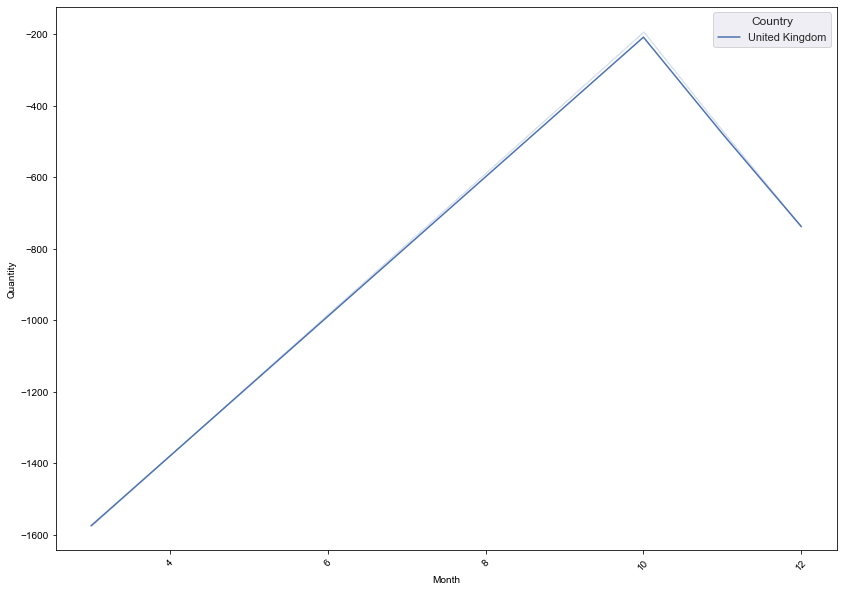

In [ ]:
# Preços por Continente/Regiao no ano 2010
plt.figure(figsize =(14,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=agg_sac_check_2011, x='Month', y='Quantity', hue='Country',ci=False)

### em este grafico podemos perceber oq acontece com a quantidades de reposições do sac, ela diminui em um periodo longo do ano, mas nos ultimos meses, desde outubro a dezembro ela começa aumentar de forma acelerada, pode ser por causa da vesperas das festas natalinas, tudo isso só no reino unido

In [ ]:
sac_damages = sac[sac['Itemname']=='damages']
sac_damages.head()

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
12973,537432,damages,-43,2010-12-06 16:10:00,0.0,United Kingdom,2010,12,6,Northern Europe
49596,540638,damages,-990,2011-01-10 12:14:00,0.0,United Kingdom,2011,1,10,Northern Europe
102236,545236,damages,-15,2011-03-01 10:32:00,0.0,United Kingdom,2011,3,1,Northern Europe
110648,546010,damages,-19,2011-03-08 15:55:00,0.0,United Kingdom,2011,3,8,Northern Europe
111930,546140,damages,-30,2011-03-09 16:35:00,0.0,United Kingdom,2011,3,9,Northern Europe


### Vamos agrupar novamente por ano 2010, zoning, country e por item e vamos avaliar

In [ ]:
agg_sac_damages_2010 = sac_damages[sac_damages['Year']==2010].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_damages_2010

,,,,,,Quantity,Price
Year,Month,Day,Zoning,Country,Itemname,,
2010,12,6,Northern Europe,United Kingdom,damages,-43,0.0


### Neste caso, somente temos um pedido com essa descrição, porem não é muito representativo
===============================================================================================================
### Vamos agrupar novamente por ano 2011, zoning, country e por item e vamos avaliar

In [ ]:
agg_sac_damages_2011 = sac_damages[sac_damages['Year']==2011].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_damages_2011.head()

Quantity  Price
Year Month Day Zoning          Country        Itemname                 
2011 1     10  Northern Europe United Kingdom damages       -990    0.0
     3     1   Northern Europe United Kingdom damages        -15    0.0
           8   Northern Europe United Kingdom damages        -19    0.0
           9   Northern Europe United Kingdom damages        -30    0.0
           11  Northern Europe United Kingdom damages       -110    0.0

### Ja neste grafico podemos observar outras coisas, o comportamento do sac com o tempo.

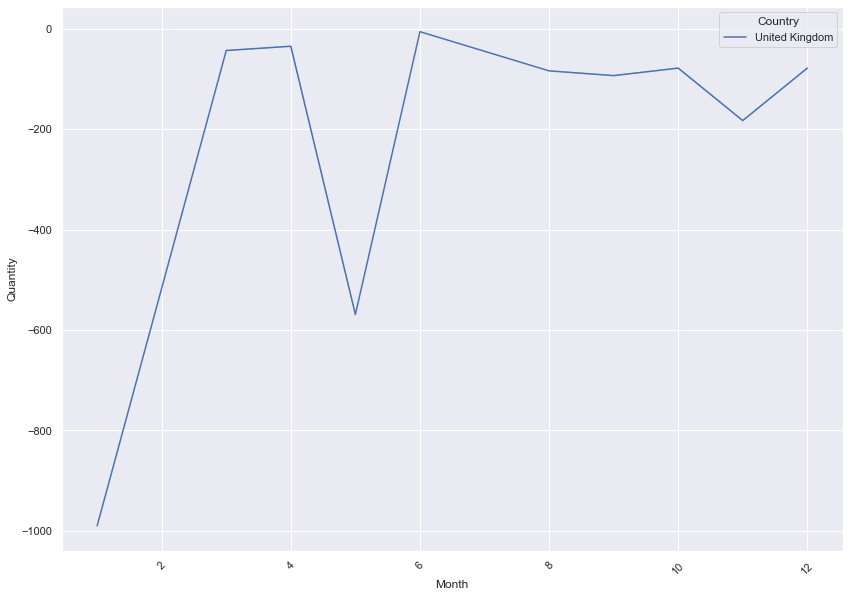

In [ ]:
# Preços por Continente/Regiao no ano 2010
plt.figure(figsize =(14,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=agg_sac_damages_2011, x='Month', y='Quantity', hue='Country',ci=False);

### e podemos concluir que sac conseguiu corregir erros ao longo do tempo, para essa classe

### Terceiro e ultimo produto, 

In [ ]:
sac_damaged = sac[sac['Itemname']=='damaged']
sac_damaged.head()

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
149090,549935,damaged,-43,2011-04-13 11:16:00,0.0,United Kingdom,2011,4,13,Northern Europe
149231,549948,damaged,-1,2011-04-13 12:55:00,0.0,United Kingdom,2011,4,13,Northern Europe
161003,550954,damaged,-2,2011-04-21 16:18:00,0.0,United Kingdom,2011,4,21,Northern Europe
164581,551302,damaged,-18,2011-04-27 14:55:00,0.0,United Kingdom,2011,4,27,Northern Europe
174394,552331,damaged,-30,2011-05-09 10:24:00,0.0,United Kingdom,2011,5,9,Northern Europe


### Agrupando elementos para avaliar em 2010

In [ ]:
agg_sac_damaged_2010 = sac_damaged[sac_damaged['Year']==2010].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_damaged_2010

,,,,,,Quantity,Price
Year,Month,Day,Zoning,Country,Itemname,,


### podemos observar que não existem elementos em 2010

### Agrupando elementos para avaliar em 2011

In [ ]:
agg_sac_damaged_2011 = sac_damaged[sac_damaged['Year']==2011].groupby(['Year','Month','Day','Zoning','Country','Itemname']).sum()
agg_sac_damaged_2011.head()

Quantity  Price
Year Month Day Zoning          Country        Itemname                 
2011 4     13  Northern Europe United Kingdom damaged        -44    0.0
           21  Northern Europe United Kingdom damaged         -2    0.0
           27  Northern Europe United Kingdom damaged        -18    0.0
     5     9   Northern Europe United Kingdom damaged        -30    0.0
           13  Northern Europe United Kingdom damaged       -160    0.0

### Ja neste grafico podemos observar outras coisas, o comportamento do sac com o tempo.

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

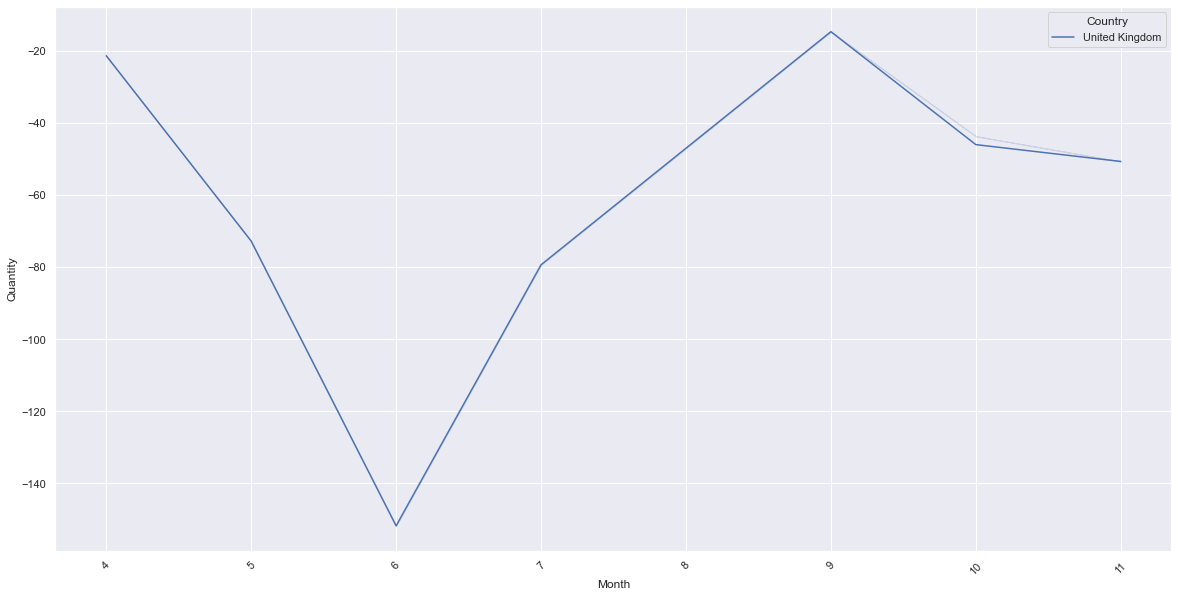

In [ ]:
# Preços por Continente/Regiao no ano 2010
plt.figure(figsize =(20,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=agg_sac_damaged_2011, x='Month',hue='Country', y='Quantity', ci=False)

### Podemos concluir que sac realizou uma boa gestao, podendo prever em alguns casos alguns problemas com entregas, umas das coisas que estao faltando é mais dados para poder avaliar com mais certeza que isso não se repete ou achar padroes em alguns meses comemorativos, onde por aumento de demanda aconteçam esses problemas.

### Conclusão: Não vamos trabalhar com esses valores, pois sao valores de items, entregados por SAC da empresa. porém vamos nos desfazer deles


In [ ]:
aserto_1 = df2.loc[df2['Quantity']>0].copy()
aserto_1[['Quantity','Price']].describe()

,Quantity,Price
count,520136.000000,520136.000000
mean,10.463154,3.840986
std,158.129245,41.977535
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


### Agora sim!, conseguimos obter um valor minimo aceptavel para Quantity
### Agora, vamos avaliar os valores para Price


In [ ]:
# Verificar Se existem valores menores que "0"
aserto_1[aserto_1['Price']<=0]

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
6275,536941,amazon,20,2010-12-03 12:08:00,0.0,United Kingdom,2010,12,3,Northern Europe
6276,536942,amazon,15,2010-12-03 12:08:00,0.0,United Kingdom,2010,12,3,Northern Europe
9097,537197,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,Germany,2010,12,5,Germanic Countries
14038,537534,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,United Kingdom,2010,12,7,Northern Europe
14039,537534,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,United Kingdom,2010,12,7,Northern Europe
...,...,...,...,...,...,...,...,...,...,...
505251,580609,Amazon,1,2011-12-05 11:41:00,0.0,United Kingdom,2011,12,5,Northern Europe
515626,581202,check,41,2011-12-07 18:30:00,0.0,United Kingdom,2011,12,7,Northern Europe
515635,581211,check,14,2011-12-07 18:36:00,0.0,United Kingdom,2011,12,7,Northern Europe
518770,581406,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,United Kingdom,2011,12,8,Northern Europe


### Temos 585 dados com valor menor e igual que 0 e com quantidades elevadas, será que é erro de input?, vamos descartar de qualquer forma pela representatividade.


In [ ]:
df3 = aserto_1[aserto_1['Price']>0].copy()
df3

,BillNo,Itemname,Quantity,Date,Price,Country,Year,Month,Day,Zoning
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,Northern Europe
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,Northern Europe
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,Northern Europe
...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,Western Europe
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,Western Europe
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,Western Europe
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,Western Europe


### Vamos verificar as estatisticas para ver se o erro foi corregido.

In [ ]:
df3[['Quantity','Price']].describe()

,Quantity,Price
count,519551.000000,519551.000000
mean,10.398361,3.887894
std,157.004952,35.954045
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


### Podemos concluir que tem erro de input e tambem tem items ingressados por SAC
================================================================================================

### Agora Vamos analisar um pouco mais os graficos


## Vamos fazer um agrupamento para ver os preços por continente/ regiao e pais em 2010.

In [ ]:
valor_preço=df3.groupby(['Year','Zoning','Country'])['Price'].sum().to_frame()
valor_preço.head()

Price
Year Zoning             Country            
2010 Benelux            Belgium      273.35
                        Netherlands  161.69
     Continental Europe Iceland       89.59
     Eastern Europe     Poland        18.99
     Far East           Japan        123.50

### Neste grafico podemos observar o comportamento das vendas e que regioes ou continentes estao participando com as vendas.


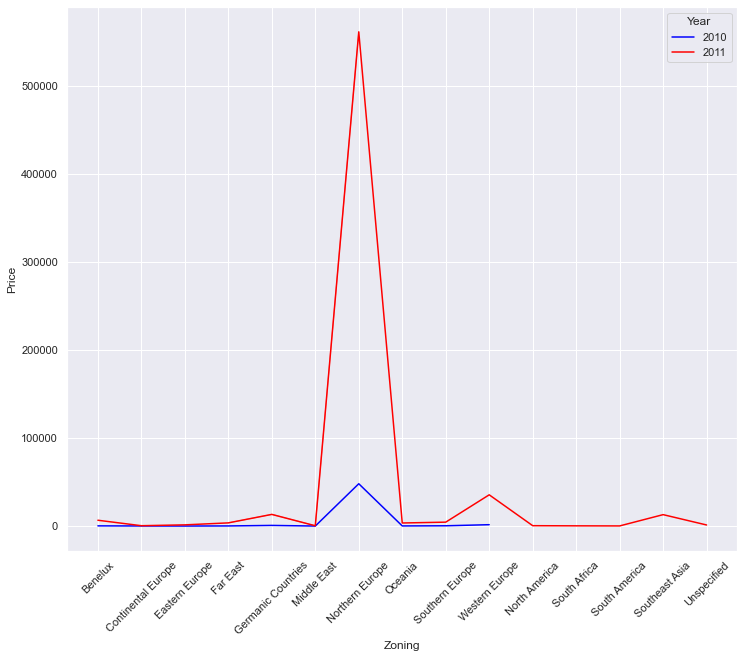

In [ ]:
# Preços por Continente/Regiao no ano 2010
plt.figure(figsize =(12,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=valor_preço,x='Zoning', y='Price',hue='Year',palette=['blue','red'],ci=False);

### Neste grafico podemos concluir que quem movimenta mais as vendas em 2010 é a regiao da europa, ja em 2011 o cenario é um pouco diferente, europa setentrional continua tendo o maior indice de vendas,seguido por Europa meridional. paises germanicos e suldeste de asia, deveriamos avaliar mais a profundidade oq está acontecendo, falta de recursos para merketing? se tiver marketin por que não tem engajamento?, preços muito altos ou mais caros do que a concorrencia?, problemas no serviço?

### Tambem poderiamos visualisar esses dados por paises e compreender quais paises foram os mais destacados em volume de vendas.


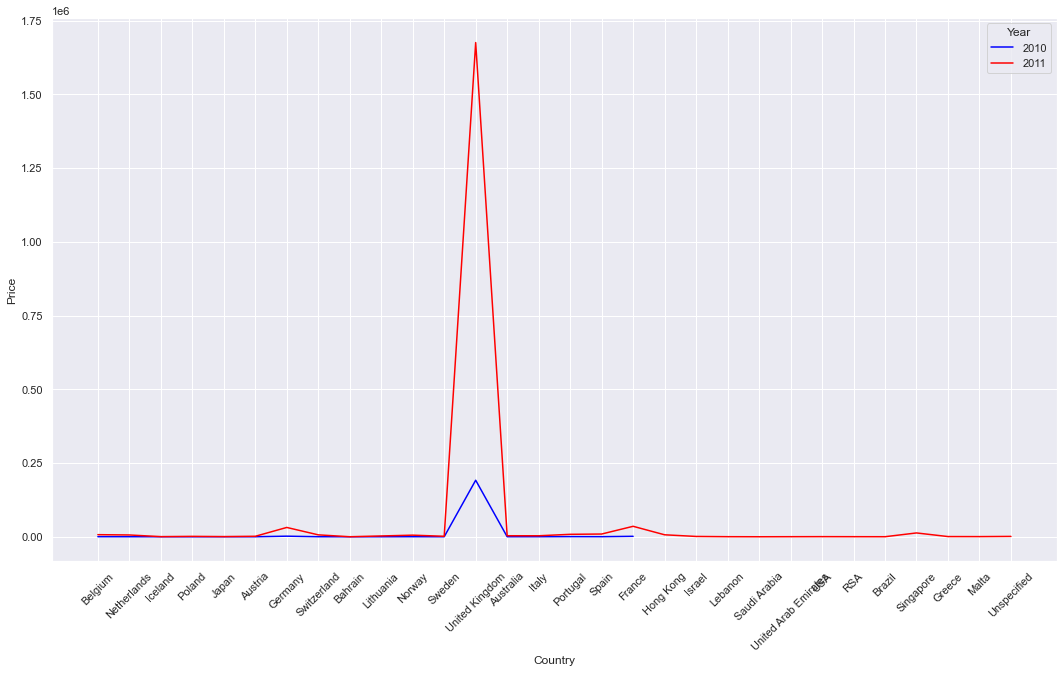

In [ ]:
# Preços por Continente e regiao no ano
plt.figure(figsize =(18,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=valor_preço,x='Country', y='Price',hue='Year',palette=['blue','red'],ci=False);

### é basicamente o mesmo resultado que o anterior

### Embora seja importante compreender as vendas, tambem é necessario ter uma estatistica de media de vendas por continentes e/ou regioes e paises em 2010.

### Agrupando ticket medio por pais e continente.

In [ ]:
valor_tm=df3.groupby(['Year','Zoning','Country'])['Price'].mean().to_frame()
valor_tm.head()

Price
Year Zoning             Country              
2010 Benelux            Belgium      2.877368
                        Netherlands  2.245694
     Continental Europe Iceland      2.890000
     Eastern Europe     Poland       2.373750
     Far East           Japan        1.900000

### Visualizando o ticket medio por continente / regiao em 2010

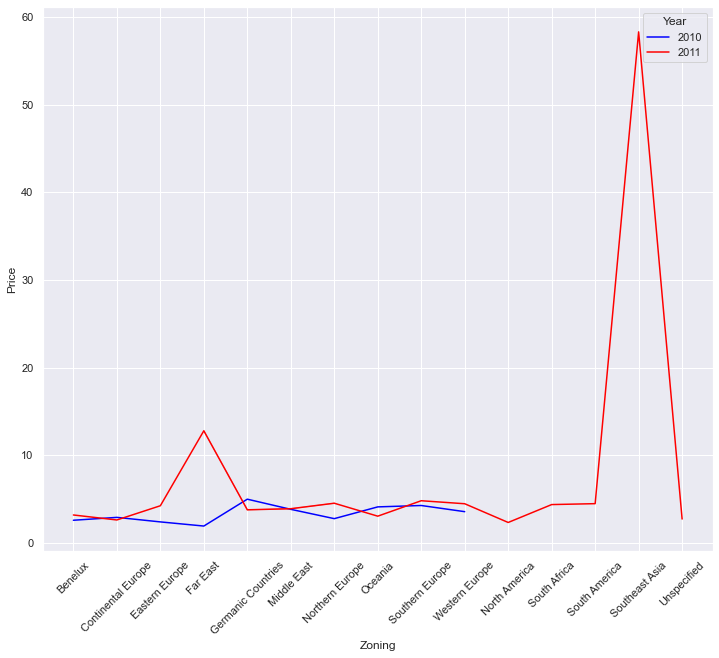

In [ ]:
# Tiket medio por Continente e regiao no ano 2010
plt.figure(figsize =(12,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=valor_tm,x='Zoning', y='Price',hue='Year', palette=['blue','red'],ci=False);

### Podemos observar o Ticket medio por continente ou regiao e percebemos que mesmo tendo pouco volume de vendas, os paises germanicos tiveram o melhor ticket medio de 2010, ja em 2011 o maior ticket medio que se gerou foi do suldeste da asia e o extremo oriente, o resto das regioes meio que mantiveram o tiveram um pequeno crescimento.

### Visualizando o ticket medio por pais em 2010

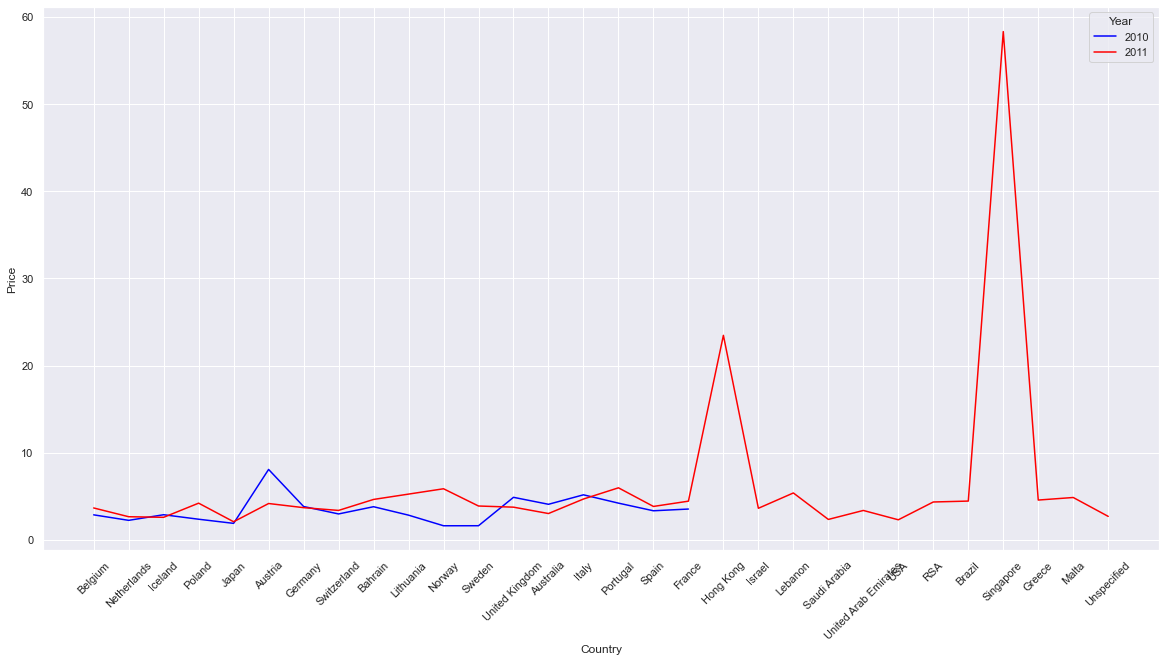

In [ ]:
# Ticket medio por Paises no ano 2010
plt.figure(figsize =(20,10))
plt.xticks(rotation=45)
sns.set_theme(style = 'darkgrid')
sns.lineplot(data=valor_tm,x='Country', y='Price',hue='Year', palette=['blue','red'],ci=False);

### em 2010, paises como austria, reino unido e italia estavam no top 3 do ticket medio, ja em 2011, tudo isso mudou, singapure teve o melhor ticket medio pode ser por diminuição de vendas, e hong kong tambem o resto apresentou um padrao parecido com o ano anterior excepto noruega, mostrando um crescimento significativo.

### Tambem, algo muito interessante a se fazer em um trabalho de e-comerce é um de motor de recomendação, para fazer ele vamos criar um novo df chamando "df_motor_recomendação"


In [ ]:
df_motor_recomendaçao = df

### Logo depois, vamos precisar tirar todos os dados nulos que existir nele

In [ ]:
df_motor_recomendaçao.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

### vamos tirar do nosso dataset os dados nulos que vao sujar nosso motor de recomendação

In [ ]:
df_motor_recomendaçao.dropna()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Vamos visualizar a quantidade de produtos, e a quantidade de clientes reais que temos.

In [ ]:
# Número dos datasets
print('Quantidade de produtos ',
df_motor_recomendaçao['Itemname'].value_counts().shape[0])
 
print('Quantidade de Clientes: ',
df_motor_recomendaçao['CustomerID'].value_counts().shape[0])
 

Quantidade de produtos  4185
Quantidade de Clientes:  4297


### agora vamos ver nossos top 5 de produtos 

In [ ]:
df_motor_recomendaçao['Itemname'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
Name: Itemname, dtype: int64

### e seguindo essa linha de raciocinio vamos ver nossos 5 melhores clientes.

In [ ]:
df_motor_recomendaçao['CustomerID'].value_counts().head()

17841.0    7847
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
Name: CustomerID, dtype: int64

### Criamos uma função simples como nosso motor de recomendação

In [ ]:
def recomenda_produto(CustomerID, Itemname):
    nome_produto = df_motor_recomendaçao.query('Itemname == @Itemname')['Itemname'].values[0]
    print('Produto: ', nome_produto)
    print('Cliente: ', CustomerID)
    if df_motor_recomendaçao.query('CustomerID == @CustomerID and Itemname == @Itemname')['CustomerID'].values.size == 0:
        print('Esse usuario nao quer o produto')
    else:
        produto = df_motor_recomendaçao.query('CustomerID == @CustomerID and Itemname == @Itemname')['Itemname'].values[0]
        print('Cliente compraria esse: ', nome_produto)
        

In [ ]:
recomenda_produto(17841,"JUMBO BAG RED RETROSPOT")

Produto:  JUMBO BAG RED RETROSPOT
Cliente:  17841
Cliente compraria esse:  JUMBO BAG RED RETROSPOT


### Prepara Base para Machine Learning


In [ ]:
# Importar Biblioteca
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from IPython.display import Image  


In [ ]:
df3= df3[['Itemname','Price', 'Country', 'Year', 'Month', 'Day', 'Zoning', 'Quantity']]

### Vamos definir nossos dados previsores e classe

### Previsores

In [ ]:
X_data = df3.iloc[:,0:7].values
X_data[0]

array(['WHITE HANGING HEART T-LIGHT HOLDER', 2.55, 'United Kingdom', 2010,
       12, 1, 'Northern Europe'], dtype=object)

### Classe

In [ ]:
y_data = df3.iloc[:,7].values
y_data

array([6, 6, 8, ..., 4, 4, 3], dtype=int64)

### Precisamos converter valores categoricos em numericos e neste caso usaremos label encoder e de paso definiremos um escalonador de valores numericos, que é o StandardScaler

In [ ]:
le = LabelEncoder()
sc = StandardScaler()

### Com esse metodo ja convertemos os valores categoricos em numericos

In [ ]:
X_data[:,0] = le.fit_transform(X_data[:,0])
X_data[:,2] = le.fit_transform(X_data[:,2])
X_data[:,6] = le.fit_transform(X_data[:,6])

### Podemos visualizar aqui que os valores ja estao de forma numerica

In [ ]:
X_data[0]

array([3824, 2.55, 28, 2010, 12, 1, 7], dtype=object)

### Embora os valores sejam numericos, podemos perceber que não estao padronizados, ou escalonados, isso dificulta um pouco o entendimento do nosso modelo. é por esse motivo que vamos escalonar os valores.

In [ ]:
X_data = sc.fit_transform(X_data)
X_data

array([[ 1.56578465, -0.03721127,  0.24197884, ...,  1.26271036,
        -1.61712872, -0.02578847],
       [ 1.57292664, -0.01384809,  0.24197884, ...,  1.26271036,
        -1.61712872, -0.02578847],
       [-1.06604106, -0.03164861,  0.24197884, ...,  1.26271036,
        -1.61712872, -0.02578847],
       ...,
       [-1.21155924,  0.00729003, -4.53683261, ...,  1.26271036,
        -0.69470758,  5.28743297],
       [-1.21245199,  0.00729003, -4.53683261, ...,  1.26271036,
        -0.69470758,  5.28743297],
       [-1.6052618 ,  0.02954068, -4.53683261, ...,  1.26271036,
        -0.69470758,  5.28743297]])

### Ja escalonado os valores, podemos passar a realizar nosso modelo, agora que ja temos todos os valores prontos para trabalhar, vamos proseguir a fazer uma regressao linear

In [ ]:
# Divide o dataset entre treino (70%) e teste (30%)
SEED = 1580
np.random.seed(SEED)
X_datatreino, X_datateste, y_datatreino, y_datateste = train_test_split(X_data, y_data, test_size=0.3)
X_datatreino.shape,X_datateste.shape, y_datatreino.shape, y_datateste.shape

((363685, 7), (155866, 7), (363685,), (155866,))

In [ ]:
# Gera o modelo de regressão linear (lm) no dataset de treino
modelolm = LinearRegression().fit(X_datatreino, y_datatreino)

### Vamos ver algumas previsoes

In [ ]:
previsoes = modelolm.predict(X_datateste)
previsoes

array([ 9.67866355,  9.94847226,  9.5275856 , ...,  9.89968911,
       25.8913129 ,  9.96948897])

### Valida e testa a performance do modelo

In [ ]:
modelolm.score(X_datateste, y_datateste)

0.00012494712079169634

In [ ]:
# Avaliação dos Erros do Modelo - MAE (Erro Médio Absoluto)
maelm = mean_absolute_error(y_datateste, previsoes)
maelm

11.399691305866494

### Podemos perceber que o Erro medio absoluto do modelo neste casso é de 11

### Iniciaremos nosso modelo de floresta randomica

In [ ]:
modelofr = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_datatreino, y_datatreino)


### Previsoes para fr

In [ ]:
# Faz as previsoes no dataset de teste
previsoesfr = modelofr.predict(X_datateste)


### Score de performance do modelo

In [ ]:
# Valida e testa a performance do Modelo. Qual foi o score (R2)?
modelofr.score(X_datateste, y_datateste)

0.005437427732472466

### Error media absoluta.

In [ ]:
# Avaliação dos Erros do Modelo - MAE (Erro Médio Absoluto)
maefr = mean_absolute_error(y_datateste, previsoesfr)
maefr

7.341642819878139

### Podemos perceber que o Erro medio absoluto do modelo neste casso é menor do que a regressao linear, porem a performance foi melhor do que se esperava.

### Como conclusão poderiamos testar outros modelos e até criar uma rede neural para adequar um pouco mais a realidade desse dataset, ou simplesmente descartar essa amostra e tentar realizar com outra, com outros anhadindo outros dados.